<a href="https://colab.research.google.com/github/PashkevichEvgeny/PYTHON-SEMINAR/blob/master/may25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Семинар 9. Работа с табличными данными

## Работа в группах

In [ ]:
import pandas as pd

In [ ]:
# Считать файл
df = pd.read_csv('sample_data/california_housing_test.csv')

In [ ]:
# Посмотреть сколько в нем строк и столбцов
df.shape

In [ ]:
# Определить какой тип данных имеют столбцы
df.dtypes

In [ ]:
# Проверить есть ли в файле пустые значения
df.isnull().sum()

In [ ]:
# 2. Показать median_house_value где median_income < 2
df[(df['median_income'] < 2)]['median_house_value']

In [ ]:
# 2.1 Показать колонки (median_house_value, total_rooms), где median_income < 2
df[(df['median_income'] < 2)][['median_house_value', 'total_rooms']]

In [ ]:
# 3. Показать данные в первых 2 столбцах
df[df.columns[:2]]

In [ ]:
# Выбрать данные где housing_median_age < 20 и median_house_value > 70000
df[(df['housing_median_age'] < 20) & (df['median_house_value'] > 70000)]

In [ ]:
# Определить какое максимальное и минимальное значение median_house_value
df['median_house_value'].max(), df['median_house_value'].min()

In [ ]:
# Показать максимальное median_house_value, где median_income = 3.1250
df[df['median_income'] == 3.1250]['median_house_value'].max()

In [ ]:
# Узнать какая максимальная population в зоне минимального значения median_house_value
df[df['median_house_value'] == df['median_house_value'].min()]['population'].max()

## Домашнее задание

In [ ]:
df = pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
# Определить среднюю стоимость дома, где кол-во людей от 0 до 500 (population)
df[df['population'] <= 500]['median_house_value'].mean()

206799.95140186916

In [ ]:
# Узнать какая максимальная households в зоне минимального значения population
df[df['population'] == df['population'].min()]['households'].max()

4.0

# Семинар 10. Постороение графиков

## Работа в группах

In [ ]:
df = pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Изобразите отношение households к population с помощью точечного графика

<Axes: xlabel='households', ylabel='population'>

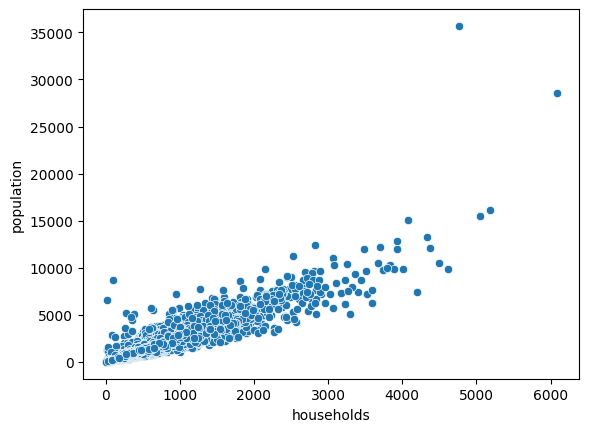

In [ ]:
sns.scatterplot(data=df, x='households', y='population')

Визуализировать longitude по отношения к
median_house_value, используя линейный график

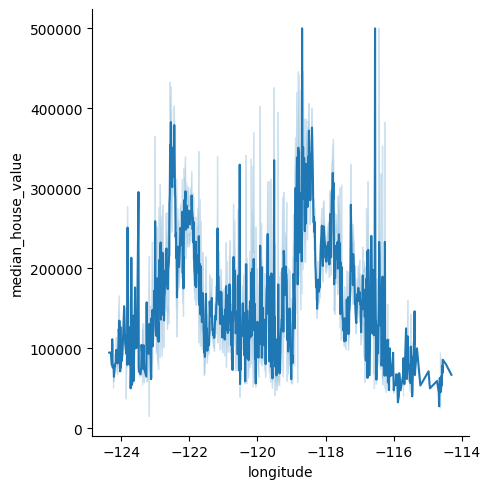

In [ ]:
sns.relplot(x='longitude', y='median_house_value', kind='line', data=df)

Представить гистограмму по housing_median_age

<Axes: xlabel='housing_median_age', ylabel='Count'>

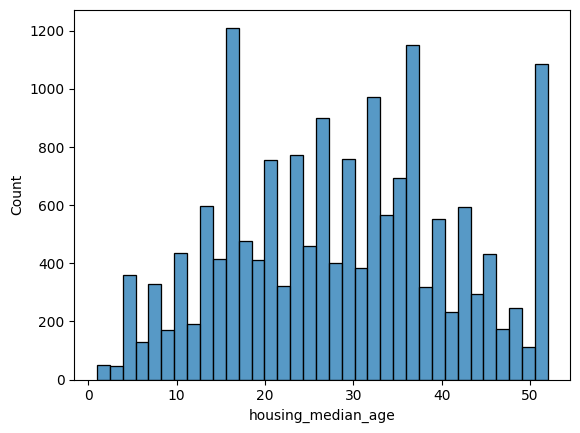

In [ ]:
sns.histplot(data=df, x="housing_median_age")

Изобразить гистограмму по median_house_value с
оттенком housing_median_age

In [ ]:
sns.histplot(data=df, x="median_house_value", hue="housing_median_age")

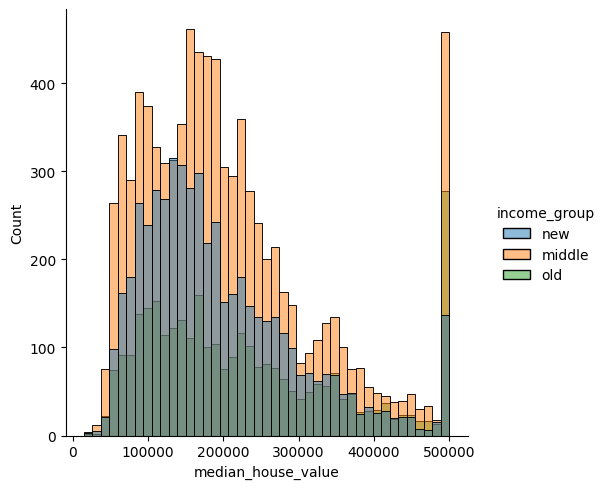

In [ ]:
df.loc[df['housing_median_age'] <= 20, 'income_group'] = 'new'
df.loc[(df['housing_median_age'] > 20) & (df['housing_median_age'] <= 40), 'income_group'] = 'middle'
df.loc[df['housing_median_age'] > 40, 'income_group'] = 'old'
sns.displot(df, x="median_house_value", hue="income_group")

Написать EDA для датасета про пингвинов
* Использовать 2-3 точечных графика
* Применить доп измерение в точечных графиках, используя
аргументы hue, size, stile
* Использовать PairGrid с типом графика на ваш выбор
* Изобразить Heatmap
* Использовать 2-3 гистограммы



In [ ]:
pg = sns.load_dataset("penguins")
pg.head(n=10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


Создать новый столбец в таблице с
пингвинами, который будет отвечать за
показатель длины клюва пингвина.
* high - длинный(от 42)
* middle - средний(от 35 до 42)
* low - маленький(до 35)

In [ ]:
beak_length = ['high' if i >= 42 else 'middle' if i > 35 else 'low' for i in pg['bill_length_mm']]
pg['beak_length'] = beak_length
pg.head(n=10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,beak_length
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,middle
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,middle
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,middle
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,low
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,middle
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,middle
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,middle
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,middle
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,low
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,high


Изобразить гистограмму по flipper_length_mm
с оттенком height_group. Сделать анализ

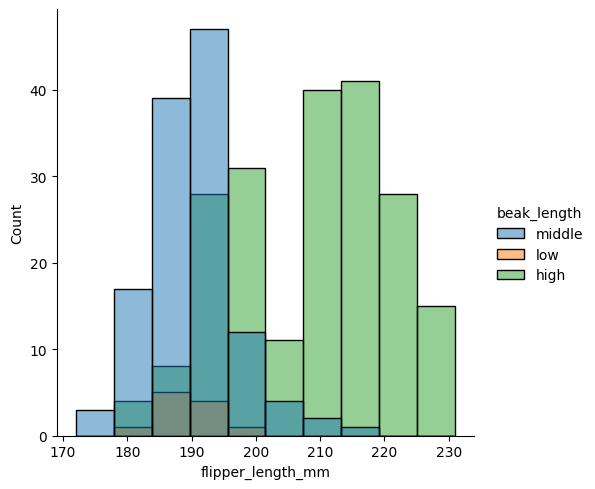

In [ ]:
sns.displot(data=pg, x="flipper_length_mm", hue="beak_length")

## Домашнее задание

В ячейке ниже представлен код генерирующий DataFrame, которая состоит всего
из 1 столбца.


In [ ]:
import random
lst = ['robot'] * 10
lst += ['human'] * 10
random.shuffle(lst)
data = pd.DataFrame({'whoAmI':lst})
data.head(n=10)

,whoAmI
0,robot
1,human
2,robot
3,robot
4,robot
5,human
6,human
7,robot
8,robot
9,human


Ваша задача перевести его в one hot вид. Сможете ли вы это сделать без
get_dummies?

[Что такое one hot вид?](https://colab.research.google.com/drive/1qKamnDiRmpRZkpiqWPkunBdAhmzhMcGz?usp=sharing)

In [ ]:
data = pd.DataFrame({'whoAmI':lst})
# data.loc[data['whoAmI'] == 'robot', 'whoAmI'] = 0
# data.loc[data['whoAmI'] == 'human', 'whoAmI'] = 1
data = data.replace({'whoAmI':{'robot':0, 'human':1}})
data.head(n=10)

,whoAmI
0,0
1,1
2,0
3,0
4,0
5,1
6,1
7,0
8,0
9,1


In [ ]:
lst = [0 if i == 'robot' else 1 for i in lst]
data = pd.DataFrame({'whoAmI':lst})
data.head(n=10)

,whoAmI
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,1


In [ ]:
for k, v in enumerate(data['whoAmI'] == 'human'):
  print(k, 1) if v else print(k, 0)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
